In [1]:
#@title  Data Scenarios and optimal parameters to predict the heat   load    (Shoulder term/ Workdays/ Model C)

In [2]:
# The process of model optimization to predict the heat load is carried out by evaluating the effect of including various type of input parameters. 
# We recalibrate the model parameters for prediction purpose.

In [3]:
# we import the required libraries
import numpy as np
import pandas as pd
import datetime as dt 
import matplotlib.pyplot as plt
from numpy import percentile
import seaborn as sns


In [4]:
# We upload the generated excel file after implementing the model fitting.
# In the Github repository we go to: Organized Data ==> Data ==> Select the folder: 10259_after_model_fitting ==> Select the file : 10259(shoulder_workdays)_after_model_fitting.xlsx
from google.colab import files
uploaded = files.upload()

Saving 10259(shoulder_workdays)_after_model_fitting.xlsx to 10259(shoulder_workdays)_after_model_fitting.xlsx


In [5]:
# Convert the excel file into pandas Dataframe
import io 
F = pd.read_excel(io.BytesIO(uploaded['10259(shoulder_workdays)_after_model_fitting.xlsx']))
F

,READ_DATE,Day,Day_month,Month,Year,Hour,Hour_day,Week_Day,Temperature,Irradiation.flux,...,Irradiation_flux_lag18,Irradiation_flux_lag19,Irradiation_flux_lag20,Irradiation_flux_lag21,Irradiation_flux_lag22,Irradiation_flux_lag23,Irradiation_flux_lag24,resid,predicted,standardized_residuals
0,2019-03-01 00:00:00,60,1,3,2019,1417,0,FRI,-3.0,1.4,...,2.1,2.1,1.8,1.4,1.4,1.3,0.9,-2.994844,22.694844,-1.383385
1,2019-03-01 01:00:00,60,1,3,2019,1418,1,FRI,-3.7,1.6,...,17.5,2.1,2.1,1.8,1.4,1.4,1.3,0.162438,21.317562,0.074932
2,2019-03-01 02:00:00,60,1,3,2019,1419,2,FRI,-4.5,2.2,...,65.8,17.5,2.1,2.1,1.8,1.4,1.4,0.117061,21.682939,0.054023
3,2019-03-01 03:00:00,60,1,3,2019,1420,3,FRI,-5.1,2.7,...,190.3,65.8,17.5,2.1,2.1,1.8,1.4,7.632569,22.367431,3.522295
4,2019-03-01 04:00:00,60,1,3,2019,1421,4,FRI,-5.4,3.4,...,302.0,190.3,65.8,17.5,2.1,2.1,1.8,-2.861837,24.861837,-1.325295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603,2019-11-29 19:00:00,333,29,11,2019,7988,19,FRI,4.9,1.0,...,1.0,1.8,1.8,1.6,1.4,1.4,0.9,1.668460,14.801540,0.769196
1604,2019-11-29 20:00:00,333,29,11,2019,7989,20,FRI,5.2,0.7,...,1.5,1.0,1.8,1.8,1.6,1.4,1.4,0.387500,15.112500,0.178628
1605,2019-11-29 21:00:00,333,29,11,2019,7990,21,FRI,4.9,0.8,...,2.0,1.5,1.0,1.8,1.8,1.6,1.4,-0.099975,16.499975,-0.047721
1606,2019-11-29 22:00:00,333,29,11,2019,7991,22,FRI,4.5,1.1,...,2.0,2.0,1.5,1.0,1.8,1.8,1.6,3.032197,15.567803,1.397692


In [6]:
#In this context, three different data scenarios have been created to each model in winter and shoulder season.
# 1st Data Scenario: Model with only lagged heat load data
# 2nd Data Scenario: Model with lagged weather data (lagged heat load data + lagged temperature + lagged irradiation flux)
# 3rd Data Scenario: Model with calendar data (lagged heat load data + lagged temperature + lagged irradiation flux + calendar data ) 
# When performing the calibration, we will end up having each Data Scenario with optimal parameters.    

In [7]:
# We calibrate and refit the model using the ols method
#Adding variables are based on an iterative process that use forward selection method.
#Every addition of input variables (forward selection method) to the model is evaluated using different evaluation metrics such as the Akaike information criterion (AIC), Bayesian information criterion (BIC)and Adjusted R-squared

#Separation of significant indeppendent variables and dependent variables
import pandas as pd
import statsmodels.api as sm
X = F[['POWER1_lag1','POWER1_lag2','POWER1_lag3','Temperature_lag0','Temperature_lag1','Temperature_lag2','Irradiation_flux_lag0','Irradiation_flux_lag1','Irradiation_flux_lag2','Thursday_2h','Friday_7h','Friday_10h','Friday_11h','Friday_21h','Monday_0h','Monday_1h','Monday_8h']] 
Y = F['POWER1_lag0']

In [8]:
import pandas as pd
import statsmodels.api as sm
from sklearn import linear_model
import statsmodels.formula.api as smf
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:            POWER1_lag0   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     709.9
Date:                Sat, 04 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:12:25   Log-Likelihood:                -3517.1
No. Observations:                1608   AIC:                             7070.
Df Residuals:                    1590   BIC:                             7167.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     7.90

In [9]:
#@title  Comparison of Models’ performance with Different Data Scenarios (Shoulder term/ Workdays/ Model C)

In [10]:
# After identifying the data scenarios with optimal parameters.
# In this part, with the testing data, we choose the  best data scenario that generate more accurate prediction. 
# We use the mean absolute error (MAE) and the root mean square error (RMSE) as evaluation metrics to perform this step.

In [11]:
# We upload the testing data  excel file.
# In the Github repository we go to: Organized Data ==> Data ==> Select the folder: 10259_after_model_fitting_testing_data ==> Select the file : 10259(shoulder_workdays)_after_model_fitting_testing_data.xlsx
from google.colab import files
uploaded = files.upload()

Saving 10259(shoulder_workdays)_after_model_fitting_testing_data.xlsx to 10259(shoulder_workdays)_after_model_fitting_testing_data.xlsx


In [12]:
# Convert the excel file into pandas Dataframe
import io 
F_testing = pd.read_excel(io.BytesIO(uploaded['10259(shoulder_workdays)_after_model_fitting_testing_data.xlsx']))
F_testing

,READ_DATE,Day,Day_month,Month,Year,Hour,Hour_day,Week_Day,Temperature,Irradiation.flux,...,Irradiation_flux_lag18,Irradiation_flux_lag19,Irradiation_flux_lag20,Irradiation_flux_lag21,Irradiation_flux_lag22,Irradiation_flux_lag23,Irradiation_flux_lag24,resid,predicted,standardized_residuals
0,2019-03-04 00:00:00,63,4,3,2019,1489,0,MON,-3.2,3.7,...,4.7,4.2,4.0,3.6,3.3,2.5,2.3,-0.028252,21.128252,-0.013177
1,2019-03-04 01:00:00,63,4,3,2019,1490,1,MON,-3.2,4.3,...,21.5,4.7,4.2,4.0,3.6,3.3,2.5,0.815184,20.664816,0.380103
2,2019-03-04 02:00:00,63,4,3,2019,1491,2,MON,-3.1,4.8,...,75.0,21.5,4.7,4.2,4.0,3.6,3.3,-0.104762,20.904762,-0.046801
3,2019-03-04 03:00:00,63,4,3,2019,1492,3,MON,-3.1,4.5,...,98.3,75.0,21.5,4.7,4.2,4.0,3.6,-1.422178,20.922178,-0.635213
4,2019-03-04 04:00:00,63,4,3,2019,1493,4,MON,-3.2,4.6,...,201.8,98.3,75.0,21.5,4.7,4.2,4.0,-0.065177,20.465177,-0.029114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,2019-11-28 19:00:00,332,28,11,2019,7964,19,THU,1.7,0.9,...,4.3,4.3,3.5,3.4,3.2,3.3,3.8,-0.928911,18.428911,-0.415017
1532,2019-11-28 20:00:00,332,28,11,2019,7965,20,THU,1.7,1.4,...,4.2,4.3,4.3,3.5,3.4,3.2,3.3,-1.344845,17.844845,-0.600852
1533,2019-11-28 21:00:00,332,28,11,2019,7966,21,THU,1.8,1.4,...,4.4,4.2,4.3,4.3,3.5,3.4,3.2,5.522808,16.977192,2.466289
1534,2019-11-28 22:00:00,332,28,11,2019,7967,22,THU,1.8,1.6,...,4.2,4.4,4.2,4.3,4.3,3.5,3.4,-0.233087,18.673087,-0.104283


In [13]:
# we calculate the MAE metric for the testing data for each data scenario 
# we calculate the RMSE for the testing data for each data scenario
import math
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error
# we calculate  mean absolute error (MAE) 
error = mae(F_testing['POWER1'], F_testing['predicted'])
# We print the value of MAE and RMSE
print("Mean absolute error : " + str(error))
MSE = np.square(np.subtract(F_testing['POWER1'],F_testing['predicted'])).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)



Mean absolute error : 1.6612903154721277
Root Mean Square Error:

2.2285754258022963


In [14]:
#@title Seasonal Performance Variations (Shoulder term/ Workdays/ Model C)

In [15]:
# We evaluate the performance of the model in each month, where the forecast error varies with time of the days

In [16]:
# we notice some duplicates appear in the dataset ("F_testing"). They need to be removed.
F_testing =F_testing.T.drop_duplicates().T
# The duplicates still exist, although we applied the removal process. 
# We decided to remove the duplicates gradually meaning: 
# For example if we want to evaluate the performance of the model on March  at 23:00:
# we filter the dataset to extract the rows belonging to March and then the rows belonging to 23:00 hours on March. 
F_testing_month=F_testing[(F_testing['Month'] == 3)]
F_testing_month =F_testing_month.T.drop_duplicates().T
F_testing_hours=F_testing_month[(F_testing['Hour_day'] == 23)]
F_testing_hours =F_testing_hours.T.drop_duplicates().T

<ipython-input-16-2bf6aa767765>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  F_testing_hours=F_testing_month[(F_testing['Hour_day'] == 23)]


In [17]:
# To evaluate the performance of the model in each month at specific hour, we calculate the aggregated values of MAE , RMSE and MAPE (mean absolute error). 
# These metrics are calculated for every hour in each month. 
from sklearn.metrics import mean_squared_error 
error = mae(F_testing_hours['POWER1'], F_testing_hours['predicted'])
print("Mean absolute error : " + str(error))
MSE = np.square(np.subtract(F_testing_hours['POWER1'],F_testing_hours['predicted'])).mean() 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)
# We calculate and print the value of MAPE 
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(F_testing_hours['POWER1'], F_testing_hours['predicted'])
print("Mean absolute percentage error :\n")
print(MAPE)

Mean absolute error : 3.18834098943013
Root Mean Square Error:

3.9841511653216557
Mean absolute percentage error :

0.13813224985555317


In [18]:
# We collect the aggregated evaluation metrics values (calculated above) in excel file called "seasonal performance variation"
# Note: "the seasonal performance variation" excel file contain all the aggregated evaluation metrics values of all selected models. 
# The evaluation metric data in this file are both for winter and shoulder term.
# In the Github repository we go to: Organized Data ==> Data ==> seasonal performance variation.xlsx

In [19]:
#We upload the seasonal performance variations file.
from google.colab import files
uploaded = files.upload()

Saving seasonal performance variation.xlsx to seasonal performance variation.xlsx


In [20]:
# Convert the excel file into pandas Dataframe
import io
dk = pd.read_excel(io.BytesIO(uploaded['seasonal performance variation.xlsx']))
dk

,Hour_day,seasonal_term,type_day,Month,MAE,RMSE,MAPE
0,0,Winter,workday,December,1.388,1.829,0.083
1,1,Winter,workday,December,2.292,2.527,0.135
2,2,Winter,workday,December,1.365,1.527,0.083
3,3,Winter,workday,December,1.333,1.602,0.079
4,4,Winter,workday,December,1.474,1.803,0.089
...,...,...,...,...,...,...,...
427,19,Shoulder,weekend,november,2.098,2.513,0.116
428,20,Shoulder,weekend,november,1.250,1.508,0.076
429,21,Shoulder,weekend,november,2.645,3.545,0.118
430,22,Shoulder,weekend,november,2.451,3.048,0.129


In [21]:
# We filter the dataframe by month , season and type of the week
#  a new dataframe can be created based on the filtered dataframe. (called 'df_weekday')
df_month= dk[(dk['Month'] == 'March' )]
df_season=df_month[(df_month['seasonal_term'] == 'Shoulder')]
df_weekday= df_month[(df_month['type_day'] == 'workday')]
df_weekday


,Hour_day,seasonal_term,type_day,Month,MAE,RMSE,MAPE
144,0,Shoulder,workday,March,1.830,2.709,0.084
145,1,Shoulder,workday,March,0.783,1.031,0.040
146,2,Shoulder,workday,March,0.665,0.948,0.033
147,3,Shoulder,workday,March,0.687,0.978,0.032
148,4,Shoulder,workday,March,0.286,0.363,0.016
149,5,Shoulder,workday,March,0.286,0.346,0.015
150,6,Shoulder,workday,March,1.161,1.476,0.057
151,7,Shoulder,workday,March,2.183,2.898,0.092
152,8,Shoulder,workday,March,2.079,2.393,0.102
153,9,Shoulder,workday,March,1.754,2.458,0.112


In [22]:
# In the filtered dataframe ('df_weekday') we convert the MAPE value to percentage (new column : percentage MAPE)
# this process is done to simplify the interpretation of the MAPE value. 
df_weekday['percentage MAPE'] = df_weekday['MAPE'] * 100
df_weekday

,Hour_day,seasonal_term,type_day,Month,MAE,RMSE,MAPE,percentage MAPE
144,0,Shoulder,workday,March,1.830,2.709,0.084,8.4
145,1,Shoulder,workday,March,0.783,1.031,0.040,4.0
146,2,Shoulder,workday,March,0.665,0.948,0.033,3.3
147,3,Shoulder,workday,March,0.687,0.978,0.032,3.2
148,4,Shoulder,workday,March,0.286,0.363,0.016,1.6
149,5,Shoulder,workday,March,0.286,0.346,0.015,1.5
150,6,Shoulder,workday,March,1.161,1.476,0.057,5.7
151,7,Shoulder,workday,March,2.183,2.898,0.092,9.2
152,8,Shoulder,workday,March,2.079,2.393,0.102,10.2
153,9,Shoulder,workday,March,1.754,2.458,0.112,11.2


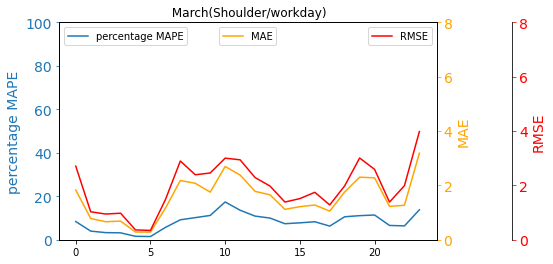

In [23]:
#We plot the performance of the selected models where the forecast error varies with time of the days: 

# we set up the first axis (x:Hour_day , y: percentage MAPE )
fig, ax1 = plt.subplots()
fig.subplots_adjust(right=1)
p1, = ax1.plot(df_weekday['Hour_day'], df_weekday['percentage MAPE']) 
ax1.set_ylabel('percentage MAPE')

ax1.legend(['percentage MAPE'], loc="upper left")
ax1.yaxis.label.set_color(p1.get_color())
ax1.yaxis.label.set_fontsize(14)
ax1.tick_params(axis='y', colors=p1.get_color(), labelsize=14)
ax1.set_ylim(0, 100)
ax2 = ax1.twinx() 
# we set up the second axis (x:Hour_day , y: MAE )
p2, = ax2.plot(df_weekday['Hour_day'], df_weekday['MAE'], color='orange')
ax2.grid(False) 
ax2.set_ylabel('MAE')
ax2.legend(['MAE'], loc="upper center")
ax2.set_ylim(0, 8)
ax2.yaxis.label.set_color(p2.get_color())
ax2.yaxis.label.set_fontsize(14)
ax2.tick_params(axis='y', colors=p2.get_color(), labelsize=14)

#  we set up the third axis (x:Hour_day , y: RMSE )
ax3 = ax1.twinx()
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.20))
p3, = ax3.plot(df_weekday['Hour_day'], df_weekday['RMSE'], color='red')
ax3.set_ylim(0, 8)
ax3.grid(False) 
ax3.set_ylabel('RMSE')

ax3.legend(['RMSE'], loc="upper right")
ax3.yaxis.label.set_color(p3.get_color())
ax3.yaxis.label.set_fontsize(14)
ax3.tick_params(axis='y', colors=p3.get_color(), labelsize=14)
plt.title(" March(Shoulder/workday)")
plt.show()


In [24]:
# We plot histograms of the forecast error of the selected models. 
#The forecast error distribution is shown for each month in the year along with 10% and 90% quantiles. 

In [25]:
# we calculate the 10th and 90th percentile of the forecasting error. 
print("10% quantile =",np.percentile(F_testing_month['resid'],10))
print("90% quantile =",np.percentile(F_testing_month['resid'],90))

10% quantile = -1.8937871898542833
90% quantile = 2.935888278019433


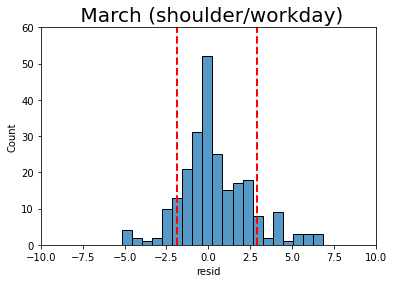

In [27]:
# Creating the histogram of the forecasting errors
# the two line represent the quantiles (10% quantile and 90 % quantile)
sns.histplot(data=F_testing_month, x="resid",log_scale=False, bins = 20)
plt.axvline(np.percentile(F_testing_month['resid'],10), color='r', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(F_testing_month['resid'],90), color='r', linestyle='dashed', linewidth=2)
plt.xlim(-10, 10)
plt.ylim(0, 60)
plt.title(" March (shoulder/workday)", fontsize=20)
plt.show()

In [28]:
# At the end, to perform a summury of the hourly forecast error for each month we calculate: 
# the root mean square error (RMSE) 
# the mean error (ME)
# Error Quantiles

# Calculate RMSE 
MSE = np.square(np.subtract(F_testing_month['POWER1'],F_testing_month['predicted'])).mean() 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE) 

# we calculate the mean  error (ME)/ # Note: The denominator represent the number of samples for each month 
ME = sum (F_testing_month['resid'])/240
print("Mean error : " + str(ME))

# we calculate the 10th and 90th percentile of the forecasting error. 
print("10% quantile =",np.percentile(F_testing_month['resid'],10))
print("90% quantile =",np.percentile(F_testing_month['resid'],90))

# we calculate the 1th and 99th percentile of the forecasting error. 
print("1% quantile =",np.percentile(F_testing_month['resid'],1))
print("99% quantile =",np.percentile(F_testing_month['resid'],99))

Root Mean Square Error:

2.142390214214909
Mean error : 0.3841086085246406
10% quantile = -1.8937871898542833
90% quantile = 2.935888278019433
1% quantile = -4.979680537802086
99% quantile = 6.408000284703594


In [ ]:
#@title (Shoulder term/ Weekends/ Model D)


In [29]:
#@title  Data Scenarios and optimal parameters to predict the heat   load (Model D)


In [30]:
# We apply the same steps that have been used for the workdays to the weekends model.
# The process of model optimization to predict the heat load is carried out by evaluating the effect of including various type of input parameters. 
# We recalibrate the model parameters for prediction purpose.

In [31]:
# We upload the generated excel file after implementing the model fitting.
# In the Github repository we go to: Organized Data ==> Data ==> Select the folder: 10259_after_model_fitting ==> Select the file : 10259(shoulder_weekends)_after_model_fitting.xlsx
from google.colab import files
uploaded = files.upload()

Saving 10259(shoulder_weekends)_after_model_fitting.xlsx to 10259(shoulder_weekends)_after_model_fitting.xlsx


In [32]:
# Convert the excel file into pandas Dataframe
import io 
F1 = pd.read_excel(io.BytesIO(uploaded['10259(shoulder_weekends)_after_model_fitting.xlsx']))
F1

,READ_DATE,Day,Day_month,Month,Year,Hour,Hour_day,Week_Day,Temperature,Irradiation.flux,...,Irradiation_flux_lag18,Irradiation_flux_lag19,Irradiation_flux_lag20,Irradiation_flux_lag21,Irradiation_flux_lag22,Irradiation_flux_lag23,Irradiation_flux_lag24,resid,predicted,standardized_residuals
0,2019-03-03 00:00:00,62,3,3,2019,1465,0,SUN,1.2,2.3,...,5.5,5.4,5.0,4.4,4.3,3.4,3.8,-2.5,20.3,-1.146254
1,2019-03-03 01:00:00,62,3,3,2019,1466,1,SUN,0.7,2.5,...,14.2,5.5,5.4,5.0,4.4,4.3,3.4,-0.3,19.5,-0.144405
2,2019-03-03 02:00:00,62,3,3,2019,1467,2,SUN,-0.9,3.3,...,49.1,14.2,5.5,5.4,5.0,4.4,4.3,-0.2,19.8,-0.083903
3,2019-03-03 03:00:00,62,3,3,2019,1468,3,SUN,-1.4,3.6,...,102.4,49.1,14.2,5.5,5.4,5.0,4.4,-0.7,20.3,-0.317660
4,2019-03-03 04:00:00,62,3,3,2019,1469,4,SUN,-1.3,4.0,...,128.5,102.4,49.1,14.2,5.5,5.4,5.0,-1.0,20.7,-0.434623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,2019-11-23 19:00:00,327,23,11,2019,7844,19,SAT,-6.1,5.3,...,5.7,5.7,5.2,5.2,5.3,5.4,5.0,3.5,20.4,1.590524
620,2019-11-23 20:00:00,327,23,11,2019,7845,20,SAT,-6.1,6.5,...,5.3,5.7,5.7,5.2,5.2,5.3,5.4,2.8,21.1,1.294369
621,2019-11-23 21:00:00,327,23,11,2019,7846,21,SAT,-5.9,6.0,...,5.3,5.3,5.7,5.7,5.2,5.2,5.3,-1.5,22.1,-0.665826
622,2019-11-23 22:00:00,327,23,11,2019,7847,22,SAT,-5.5,5.8,...,5.5,5.3,5.3,5.7,5.7,5.2,5.2,-0.2,23.1,-0.097555


In [33]:
#In this context, three different data scenarios have been created to each model in winter and shoulder season.
# 1st Data Scenario: Model with only lagged heat load data
# 2nd Data Scenario: Model with lagged weather data (lagged heat load data + lagged temperature + lagged irradiation flux)
# 3rd Data Scenario: Model with calendar data (lagged heat load data + lagged temperature + lagged irradiation flux + calendar data ) 
# When performing the calibration, we will end up having each Data Scenario with optimal parameters.    

In [34]:
# We calibrate and refit the model using the ols method
#Adding variables are based on an iterative process that use forward selection method.
#Every addition of input variables (forward selection method) to the model is evaluated using different evaluation metrics such as the Akaike information criterion (AIC), Bayesian information criterion (BIC)and Adjusted R-squared

#Separation of significant indeppendent variables and dependent variables
import pandas as pd
import statsmodels.api as sm
X = F1[['POWER1_lag1','POWER1_lag2','POWER1_lag3','Temperature_lag0','Temperature_lag1','Irradiation_flux_lag0','Irradiation_flux_lag1','Saturday_22h','Sunday_15h','Sunday_16h','Sunday_18h','Sunday_19h','Sunday_22h']] 
Y = F1['POWER1_lag0']

In [35]:
import pandas as pd
import statsmodels.api as sm
from sklearn import linear_model
import statsmodels.formula.api as smf
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:            POWER1_lag0   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     298.9
Date:                Sat, 04 Mar 2023   Prob (F-statistic):          2.09e-254
Time:                        11:23:22   Log-Likelihood:                -1351.2
No. Observations:                 624   AIC:                             2730.
Df Residuals:                     610   BIC:                             2792.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     6.69

In [36]:
#@title  Comparison of Models’ performance with Different Data Scenarios (Model D)

In [37]:
# After identifying the data scenarios with optimal parameters.
# In this part, with the testing data, we choose the  best data scenario that generate more accurate prediction. 
# We use the mean absolute error (MAE) and the root mean square error (RMSE) as evaluation metrics to perform this step. 

In [38]:
# We upload the testing data  excel file.
# In the Github repository we go to: Organized Data ==> Data ==> Select the folder: 10259_after_model_fitting_testing_data ==> Select the file : 10259(shoulder_weekends)_after_model_fitting_testing_data.xlsx
from google.colab import files
uploaded = files.upload()

Saving 10259(shoulder_weekends)_after_model_fitting_testing_data.xlsx to 10259(shoulder_weekends)_after_model_fitting_testing_data.xlsx


In [39]:
# Convert the excel file into pandas Dataframe
import io 
F1_testing = pd.read_excel(io.BytesIO(uploaded['10259(shoulder_weekends)_after_model_fitting_testing_data.xlsx']))
F1_testing

,READ_DATE,Day,Day_month,Month,Year,Hour,Hour_day,Week_Day,Temperature,Irradiation.flux,...,Irradiation_flux_lag18,Irradiation_flux_lag19,Irradiation_flux_lag20,Irradiation_flux_lag21,Irradiation_flux_lag22,Irradiation_flux_lag23,Irradiation_flux_lag24,resid,predicted,standardized_residuals
0,2019-03-02 00:00:00,61,2,3,2019,1441,0,SAT,-7.8,3.8,...,3.4,3.4,3.4,2.7,2.2,1.6,1.4,-0.5,27.5,-0.233202
1,2019-03-02 01:00:00,61,2,3,2019,1442,1,SAT,-7.7,3.4,...,15.1,3.4,3.4,3.4,2.7,2.2,1.6,9.2,27.1,4.228995
2,2019-03-02 02:00:00,61,2,3,2019,1443,2,SAT,-8.0,4.3,...,65.0,15.1,3.4,3.4,3.4,2.7,2.2,4.6,29.7,2.140280
3,2019-03-02 03:00:00,61,2,3,2019,1444,3,SAT,-8.3,4.4,...,100.4,65.0,15.1,3.4,3.4,3.4,2.7,-3.4,30.2,-1.603967
4,2019-03-02 04:00:00,61,2,3,2019,1445,4,SAT,-8.4,5.0,...,263.5,100.4,65.0,15.1,3.4,3.4,3.4,2.2,28.9,1.006719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,2019-11-30 19:00:00,334,30,11,2019,8012,19,SAT,-2.8,1.2,...,1.4,1.4,1.2,1.1,0.8,0.7,1.0,3.6,20.9,1.637468
620,2019-11-30 20:00:00,334,30,11,2019,8013,20,SAT,-3.1,1.3,...,1.3,1.4,1.4,1.2,1.1,0.8,0.7,-2.8,21.7,-1.302745
621,2019-11-30 21:00:00,334,30,11,2019,8014,21,SAT,-3.4,1.5,...,1.8,1.3,1.4,1.4,1.2,1.1,0.8,2.2,21.1,0.988268
622,2019-11-30 22:00:00,334,30,11,2019,8015,22,SAT,-2.9,2.0,...,2.1,1.8,1.3,1.4,1.4,1.2,1.1,-3.8,23.0,-1.806878


In [40]:
# we calculate the MAE metric for the testing data for each data scenario 
# we calculate the RMSE for the testing data for each data scenario
import math
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error
# we calculate  mean absolute error (MAE) 
error = mae(F1_testing['POWER1_lag0'], F1_testing['predicted'])
# We print the value of MAE and RMSE
print("Mean absolute error : " + str(error))
MSE = np.square(np.subtract(F1_testing['POWER1_lag0'],F1_testing['predicted'])).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Mean absolute error : 1.6063621794871794
Root Mean Square Error:

2.1702464633166576


In [41]:
#@title Seasonal Performance Variations (Model D)

In [42]:
# We evaluate the performance of the model in each month, where the forecast error varies with time of the days

In [43]:
# we notice some duplicates appear in the dataset ("F1_testing"). They need to be removed.
F1_testing =F1_testing.T.drop_duplicates().T
# The duplicates still exist, although we applied the removal process. 
# We decided to remove the duplicates gradually meaning: 
# For example if we want to evaluate the performance of the model on March  at 23:00:
# we filter the dataset to extract the rows belonging to March and then the rows belonging to 23:00 hours on March.
F1_testing_month=F1_testing[(F1_testing['Month'] == 3)]
F1_testing_month =F1_testing_month.T.drop_duplicates().T
F1_testing_hours=F1_testing_month[(F1_testing['Hour_day'] == 23)]
F1_testing_hours =F1_testing_hours.T.drop_duplicates().T

<ipython-input-43-26750d7f73b9>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  F1_testing_hours=F1_testing_month[(F1_testing['Hour_day'] == 23)]


In [44]:
# To evaluate the performance of the model in each month at specific hour, we calculate the aggregated values of MAE , RMSE and MAPE (mean absolute error). 
# These metrics are calculated for every hour in each month.
# we calculate  mean absolute error (MAE) 
error = mae(F1_testing_hours['POWER1'], F1_testing_hours['predicted'])
# We print the value of MAE and RMSE
print("Mean absolute error : " + str(error))
MSE = np.square(np.subtract(F1_testing_hours['POWER1'],F1_testing_hours['predicted'])).mean() 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)
from sklearn.metrics import mean_absolute_percentage_error
# We print the value of MAPE
MAPE = mean_absolute_percentage_error(F1_testing_hours['POWER1'], F1_testing_hours['predicted'])
print("Mean absolute percentage error :\n")
print(MAPE)

Mean absolute error : 1.2479999999999993
Root Mean Square Error:

1.7394826817189069
Mean absolute percentage error :

0.06724003730790609


In [ ]:
# We collect the aggregated evaluation metrics values (calculated above) in excel file called "seasonal performance variation"
# Note: "the seasonal performance variation" excel file contain all the aggregated evaluation metrics values of all selected models. 
# The evaluation metric data in this file are both for winter and shoulder term.
# In the Github repository we go to: Organized Data ==> Data ==> seasonal performance variation.xlsx

In [45]:
# We upload the seasonal performance variations file
from google.colab import files
uploaded = files.upload()

Saving seasonal performance variation.xlsx to seasonal performance variation (1).xlsx


In [46]:
# Convert the excel file into pandas Dataframe
import io
dk = pd.read_excel(io.BytesIO(uploaded['seasonal performance variation.xlsx']))
dk

,Hour_day,seasonal_term,type_day,Month,MAE,RMSE,MAPE
0,0,Winter,workday,December,1.388,1.829,0.083
1,1,Winter,workday,December,2.292,2.527,0.135
2,2,Winter,workday,December,1.365,1.527,0.083
3,3,Winter,workday,December,1.333,1.602,0.079
4,4,Winter,workday,December,1.474,1.803,0.089
...,...,...,...,...,...,...,...
427,19,Shoulder,weekend,november,2.098,2.513,0.116
428,20,Shoulder,weekend,november,1.250,1.508,0.076
429,21,Shoulder,weekend,november,2.645,3.545,0.118
430,22,Shoulder,weekend,november,2.451,3.048,0.129


In [49]:
#we filter the dataframe by month , season and type of the week 
df_month= dk[(dk['Month'] == 'March ' )]
df_season=df_month[(df_month['seasonal_term'] == 'Shoulder')]
df_weekday= df_month[(df_month['type_day'] == 'weekend')]
df_weekday


,Hour_day,seasonal_term,type_day,Month,MAE,RMSE,MAPE
288,0,Shoulder,weekend,March,1.078,1.280,0.060
289,1,Shoulder,weekend,March,3.157,4.396,0.130
290,2,Shoulder,weekend,March,1.478,2.163,0.060
291,3,Shoulder,weekend,March,1.969,2.323,0.094
292,4,Shoulder,weekend,March,1.465,2.056,0.065
293,5,Shoulder,weekend,March,1.447,1.788,0.077
294,6,Shoulder,weekend,March,0.887,1.081,0.048
295,7,Shoulder,weekend,March,1.600,2.710,0.078
296,8,Shoulder,weekend,March,3.406,4.770,0.166
297,9,Shoulder,weekend,March,1.505,2.171,0.080


In [50]:
# In the filtered dataframe ('df_weekday') we convert the MAPE value to percentage (new column : percentage MAPE)
# this process is done to simplify the interpretation of the MAPE value.
df_weekday['percentage MAPE'] = df_weekday['MAPE'] * 100
df_weekday

,Hour_day,seasonal_term,type_day,Month,MAE,RMSE,MAPE,percentage MAPE
288,0,Shoulder,weekend,March,1.078,1.280,0.060,6.0
289,1,Shoulder,weekend,March,3.157,4.396,0.130,13.0
290,2,Shoulder,weekend,March,1.478,2.163,0.060,6.0
291,3,Shoulder,weekend,March,1.969,2.323,0.094,9.4
292,4,Shoulder,weekend,March,1.465,2.056,0.065,6.5
293,5,Shoulder,weekend,March,1.447,1.788,0.077,7.7
294,6,Shoulder,weekend,March,0.887,1.081,0.048,4.8
295,7,Shoulder,weekend,March,1.600,2.710,0.078,7.8
296,8,Shoulder,weekend,March,3.406,4.770,0.166,16.6
297,9,Shoulder,weekend,March,1.505,2.171,0.080,8.0


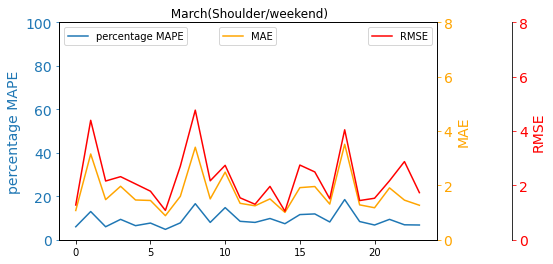

In [51]:
#We plot the performance of the selected models where the forecast error varies with time of the days:

# we set up the first axis (x:Hour_day , y: percentage MAPE )
fig, ax1 = plt.subplots()
fig.subplots_adjust(right=1)
p1, = ax1.plot(df_weekday['Hour_day'], df_weekday['percentage MAPE']) 
ax1.set_ylabel('percentage MAPE')

ax1.legend(['percentage MAPE'], loc="upper left")
ax1.yaxis.label.set_color(p1.get_color())
ax1.yaxis.label.set_fontsize(14)
ax1.tick_params(axis='y', colors=p1.get_color(), labelsize=14)
ax1.set_ylim(0, 100)
ax2 = ax1.twinx() 
# we set up the second axis (x:Hour_day , y: MAE )
p2, = ax2.plot(df_weekday['Hour_day'], df_weekday['MAE'], color='orange')
ax2.grid(False) 
ax2.set_ylabel('MAE')
ax2.legend(['MAE'], loc="upper center")
ax2.set_ylim(0, 8)
ax2.yaxis.label.set_color(p2.get_color())
ax2.yaxis.label.set_fontsize(14)
ax2.tick_params(axis='y', colors=p2.get_color(), labelsize=14)

#  we set up the third axis (x:Hour_day , y: RMSE )
ax3 = ax1.twinx()
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.20))
p3, = ax3.plot(df_weekday['Hour_day'], df_weekday['RMSE'], color='red')
ax3.set_ylim(0, 8)
ax3.grid(False) 
ax3.set_ylabel('RMSE')

ax3.legend(['RMSE'], loc="upper right")
ax3.yaxis.label.set_color(p3.get_color())
ax3.yaxis.label.set_fontsize(14)
ax3.tick_params(axis='y', colors=p3.get_color(), labelsize=14)
plt.title(" March(Shoulder/weekend)")
plt.show()


In [52]:
# We plot histograms of the forecast error of the selected models. 
#The forecast error distribution is shown for each month in the year along with 10% and 90% quantiles.

In [53]:
# we calculate the 10th and 90th percentile of the forecasting error. 
print("10% quantile =",np.percentile(F1_testing_month['resid'],10))
print("90% quantile =",np.percentile(F1_testing_month['resid'],90))

10% quantile = -1.71
90% quantile = 3.710000000000001


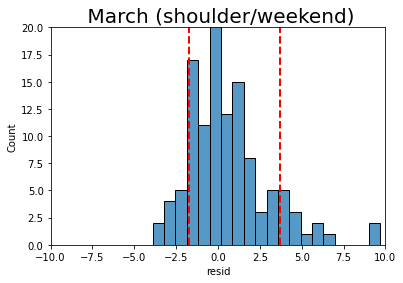

In [54]:
# Creating the histogram of the forecasting errors
# the two line represent the quantiles (10% quantile and 90 % quantile)
sns.histplot(data=F1_testing_month, x="resid",log_scale=False, bins = 20)
plt.axvline(np.percentile(F1_testing_month['resid'],10), color='r', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(F1_testing_month['resid'],90), color='r', linestyle='dashed', linewidth=2)
plt.xlim(-10, 10)
plt.ylim(0, 20)
plt.title(" March (shoulder/weekend)",fontsize =20)
plt.show()

In [55]:
# At the end, to perform a summury of the hourly forecast error for each month we calculate: 
# the root mean square error (RMSE) 
# the mean error (ME)
# Error Quantiles

In [57]:
# Calculate RMSE 
MSE = np.square(np.subtract(F1_testing_month['POWER1'],F1_testing_month['predicted'])).mean() 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE) 

# we calculate the mean  error (ME)/ # the denominator represent the number of samples for each month 
ME = sum (F1_testing_month['resid'])/120
print("Mean error : " + str(ME))


# we calculate the 10th and 90th percentile of the forecasting error. 
print("10% quantile =",np.percentile(F1_testing_month['resid'],10))
print("90% quantile =",np.percentile(F1_testing_month['resid'],90))

# we calculate the 1th and 99th percentile of the forecasting error. 
print("1% quantile =",np.percentile(F1_testing_month['resid'],1))
print("99% quantile =",np.percentile(F1_testing_month['resid'],99))

Root Mean Square Error:

2.4410378598729956
Mean error : 0.599166666666667
10% quantile = -1.71
90% quantile = 3.710000000000001
1% quantile = -3.324
99% quantile = 8.744000000000005
